In [3]:
data bottle;
input X N Y;
datalines;
    2.0  500.0   72.0
    5.0  500.0  103.0
   10.0  500.0  170.0
   20.0  500.0  296.0
   25.0  500.0  406.0
   30.0  500.0  449.0
;
run;

In [4]:
data bottle2;
set bottle;
P = Y / N;
run;


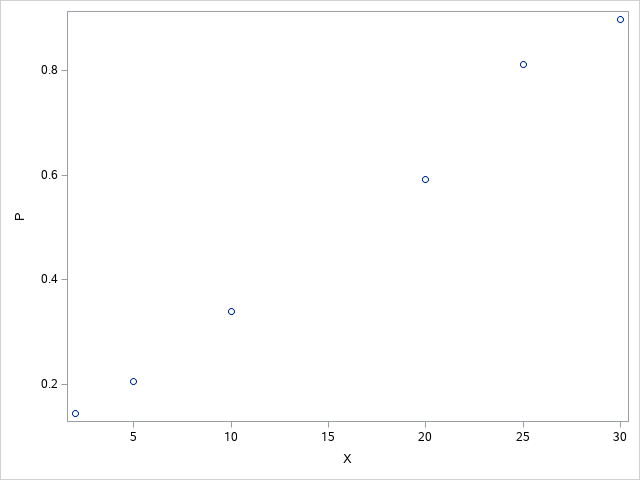

In [9]:
proc sgplot data=bottle2;
scatter  Y=P X=X;
run;

In [25]:
proc genmod data=bottle2;
model Y/N=X /link=logit dist=binomial lrci  waldci type3;
estimate 'log odds at 15' intercept 1 X 15 /exp;
ods output modelfit =FitPro out=bottle3 pred=p;
run;

In [27]:
data FitPro;
set FitPro;
pval = 1- cdf('CHISQUARE',value,DF);
run;

proc print data=FitPRo;
run;

Obs,Criterion,DF,Value,ValueDF,pval
1,Deviance,4,12.1814,3.0453,0.016052
2,Scaled Deviance,4,12.1814,3.0453,0.016052
3,Pearson Chi-Square,4,12.2941,3.0735,0.015293
4,Scaled Pearson X2,4,12.2941,3.0735,0.015293
5,Log Likelihood,_,-1531.4358,_,.
6,Full Log Likelihood,_,-24.7094,_,.
7,AIC (smaller is better),_,53.4187,_,.
8,AICC (smaller is better),_,57.4187,_,.
9,BIC (smaller is better),_,53.0023,_,.


In [14]:
proc print data = FitPRo;
run;

Obs,Criterion,DF,Value,ValueDF
1,Deviance,4,12.1814,3.0453
2,Scaled Deviance,4,12.1814,3.0453
3,Pearson Chi-Square,4,12.2941,3.0735
4,Scaled Pearson X2,4,12.2941,3.0735
5,Log Likelihood,_,-1531.4358,_
6,Full Log Likelihood,_,-24.7094,_
7,AIC (smaller is better),_,53.4187,_
8,AICC (smaller is better),_,57.4187,_
9,BIC (smaller is better),_,53.0023,_


In [1]:
data aggregated;
  input region $ gender $ race $ age $ satisf unsatisf;
  datalines;
Northeast M White <35 288 177
Mid-Atlantic M White <35 90 45
Southern M White <35 226 128
Northeast F White <35 60 57
Mid-Atlantic F White <35 19 12
Southern F White <35 88 57
Northeast M White 35-44 224 166
Mid-Atlantic M White 35-44 96 42
Southern M White 35-44 189 117
Northeast F White 35-44 35 19
Mid-Atlantic F White 35-44 12 5
Southern F White 35-44 44 34
Northeast M White >44 337 172
Mid-Atlantic M White >44 124 39
Southern M White >44 156 73
Northeast F White >44 70 30
Mid-Atlantic F White >44 17 2
Southern F White >44 70 25
Northeast M Non-White <35 38 33
Mid-Atlantic M Non-White <35 18 6
Southern M Non-White <35 45 31
Northeast F Non-White <35 19 35
Mid-Atlantic F Non-White <35 13 7
Southern F Non-White <35 47 35
Northeast M Non-White 35-44 32 11
Mid-Atlantic M Non-White 35-44 7 2
Southern M Non-White 35-44 18 3
Northeast F Non-White 35-44 22 20
Mid-Atlantic F Non-White 35-44 0 3
Southern F Non-White 35-44 13 7
Northeast M Non-White >44 21 8
Mid-Atlantic M Non-White >44 9 2
Southern M Non-White >44 11 2
Northeast F Non-White >44 15 10
Mid-Atlantic F Non-White >44 1 1
Southern F Non-White >44 9 2
;

SAS Connection established. Subprocess id is 2270



In [8]:
proc print data=aggregated (obs=2);
run;

Obs,region,gender,race,age,satisf,unsatisf
1,Northeas,M,White,<35,288,177
2,Mid-Atla,M,White,<35,90,45


In [2]:
data agg2;
set aggregated;
    count = satisf + unsatisf;
run;

In [16]:
proc genmod data=agg2;
class region gender race age / param=glm;
model satisf/count = region gender race age / link=logit dist=binomial lrci  waldci type3;
output out=fitagg p=phat;
run;

In [17]:
proc print data=fitagg;
run;

Obs,region,gender,race,age,satisf,unsatisf,count,phat
1,Northeas,M,White,<35,288,177,465,0.58415
2,Mid-Atla,M,White,<35,90,45,135,0.68578
3,Southern,M,White,<35,226,128,354,0.62758
4,Northeas,F,White,<35,60,57,117,0.54760
5,Mid-Atla,F,White,<35,19,12,31,0.65286
6,Southern,F,White,<35,88,57,145,0.59219
7,Northeas,M,White,35-44,224,166,390,0.59366
8,Mid-Atla,M,White,35-44,96,42,138,0.69418
9,Southern,M,White,35-44,189,117,306,0.63671
10,Northeas,F,White,35-44,35,19,54,0.55731


In [6]:
*backward selection;
proc logistic data=agg2;
class region gender race age;
model satisf/count = region gender race age region*gender region*race region*age gender*race gender*age race*age/selection=BACKWARD;
run;

In [7]:
*full model;
proc genmod data=agg2  DESCENDING;
class  region gender race age / param=glm;;
model satisf/count = region gender race age region*gender region*race region*age gender*race gender*age race*age / link=logit dist=binomial lrci  waldci type3;
ods output modelfit =Fitfull;
run;

In [8]:
*final model;
proc genmod data=agg2  DESCENDING;
class  region gender race age / param=glm;;
model satisf/count = region gender race age gender*race race*age / link=logit dist=binomial lrci  waldci type3;
ods output modelfit =Fitfinal;
run;

In [9]:
*LR test;
data _null_;
set Fitfull;
if Criterion='Log Likelihood' then call symput( 'LogLikeFull', Value);
set Fitfinal;
if Criterion='Log Likelihood' then call symput( 'LogLikeFinal', Value);
run;

data Compare;
likestat = -2*(&LogLikeFinal - &LogLikeFull);
like_DF = 6;
pval = 1- cdf('CHISQUARE',likestat,like_DF);
run;
proc print data=compare; run;


Obs,likestat,like_DF,pval
1,9.90359,6,0.12877
